# <span style="color:#756bb1">Distribuzioni Campionarie & Intervalli di Confidenza</span>

Si consideri una popolazione normale di dimensione N=10000 con media 100 e varianza 25</br>
Si consideri un campione casuale di ampiezza n = 30
- a) Si definisca empiricamente la distribuzione campionaria della media e si calcoli il suo valore atteso e la sua varianza, e si rappresenti la sua distribuzione
- b) Si definisca empiricamente  la distribuzione campionaria della varianza e si calcoli il suo valore atteso e la sua varianza e si rappresenti empiricamente
- c) Si definisca empiricamente la distribuzione campionaria della mediana e si calcoli il suo valore atteso e la sua varianza e si rappresenti empiricamente
- d) Si calcoli un IDC per la media con livello di confidenza pari al 95% e si dimostri empiricamente l'adeguatezza del livello di confidenza
- e) Si calcoli un IDC per la varianza con livello di confidenza pari al 90% e si dimostri empiricamente l'adeguatezza del livello di confidenza

#### <span style="color:#3182bd">Parameters</span>

In [2]:
set.seed(123)
N <- 10000 # popolazione
X <- rnorm(10000, 100, sqrt(25)) # campione di riferimento
n <- 30 # dimensione del campione
B <- 10000 # numero di campioni

#### <span style="color:#3182bd">Vettori</span>

In [3]:
medieC <- varianzeC <- medianeC <- varianzeCC <- rep(NA, B)
for(i in 1:B){
  s <- sample(X, n, replace = F) # senza reinserimento
  medieC[i] <- mean(s)
  medianeC[i] <- median(s)
  varianzeCC[i] <- var(s)
  varianzeC[i] <- varianzeCC[i] * ((n-1)/n)
}

## <span style="color:#e6550d">Distribuzioni Campionarie</span>

### <span style="color:#31a354">della <b><i>Media</i></b> con <b><i>Varianza NOTA</i></b></span>

- a) Si definisca empiricamente la distribuzione campionaria della media e si calcoli il suo valore atteso e la sua varianza, e si rappresenti la sua distribuzione

![Screenshot 2023-12-31 at 11.50.46.png](<attachment:Screenshot 2023-12-31 at 11.50.46.png>)
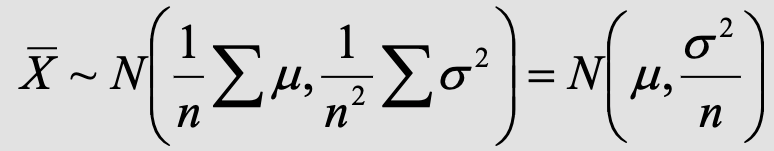

[1]  99.80703 100.78177  99.77475  99.91221  99.58589  99.57031  99.70855
 [8] 100.22853 101.80804  99.44943

[1] 99.98781

[1] 0.8408795

[1] 0.8310626

Valore atteso della media campionaria:  99.98781 
Varianza della media campionaria:  0.8408795 


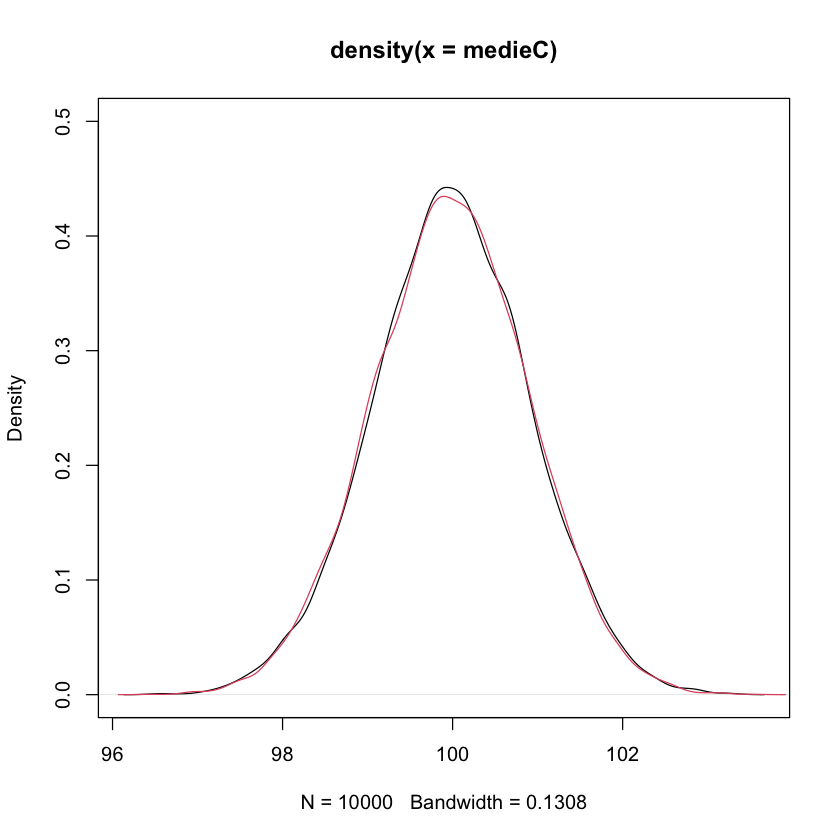

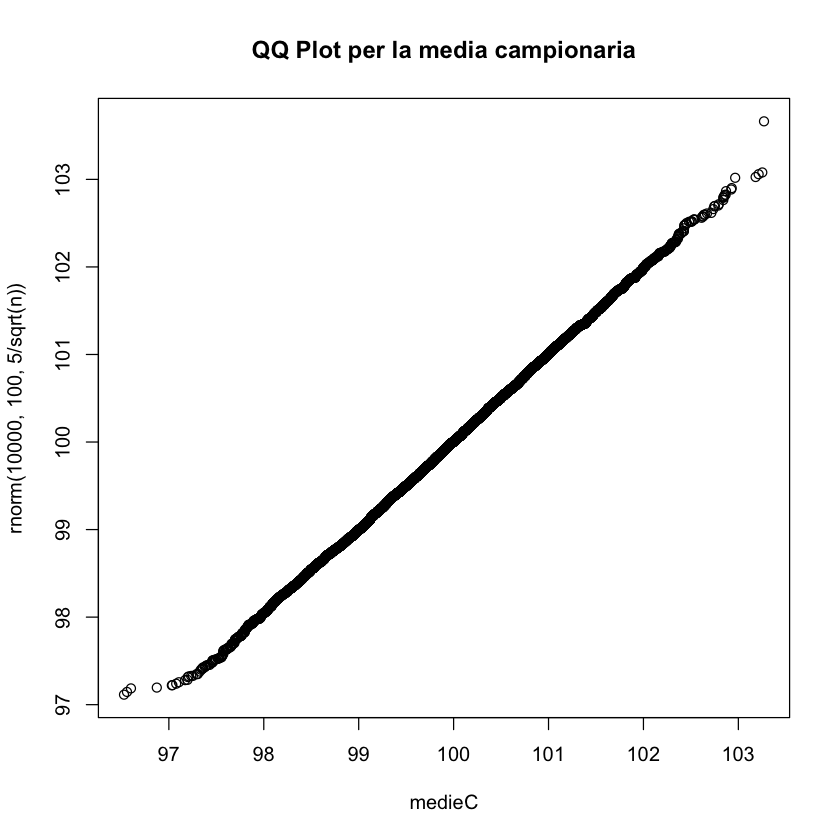

In [4]:
par(bg="white")
medieC[1:10] # prime 10 medie

mean(medieC) # media delle medie

# La varianza delle medie deve essere uguale alla varianza della popolazione divisa per n
var(medieC) # varianza delle medie
var(X)/n    # la varianza della popolazione divisa per n

cat("Valore atteso della media campionaria: ", mean(medieC), "\n")
cat("Varianza della media campionaria: ", var(medieC), "\n")

plot(density(medieC), ylim=c(0,0.5))
lines(density(rnorm(10000, 100, 5/sqrt(n))), col=2)

# Metodo alternativo per confrontare la distribuzione delle medie con la normale
# Riusciamo a capire meglio cosa succede nelle code della distribuzione
qqplot(medieC,rnorm(10000, 100, 5/sqrt(n)), main = "QQ Plot per la media campionaria")

### <span style="color:#31a354">della <b><i>Proporzione Campionaria</i></b></span>

### <span style="color:red"> Da Verificare</span>

![Screenshot 2024-01-09 at 14.48.25.png](<attachment:Screenshot 2024-01-09 at 14.48.25.png>)
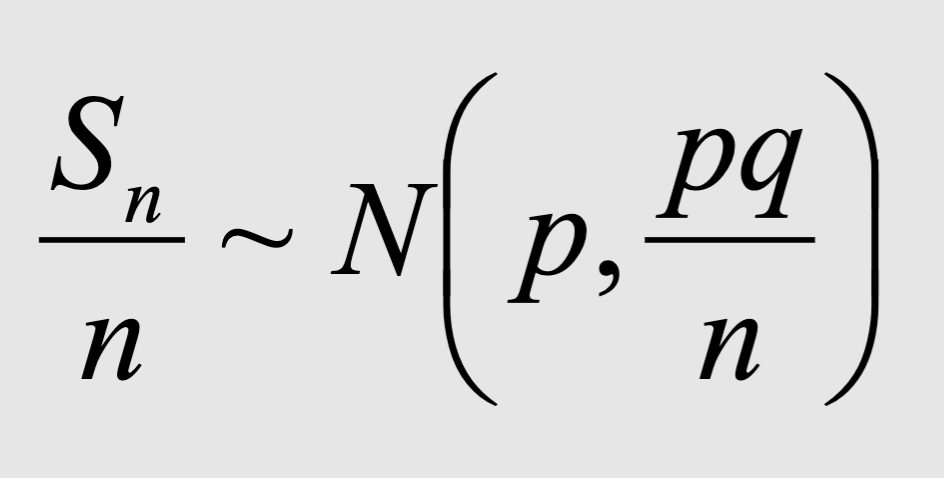

Empirical Expected Value:  0.4999461 
Empirical Variance:  0.0002470057 
Theoretical Expected Value:  0.5 
Theoretical Variance:  0.00025 


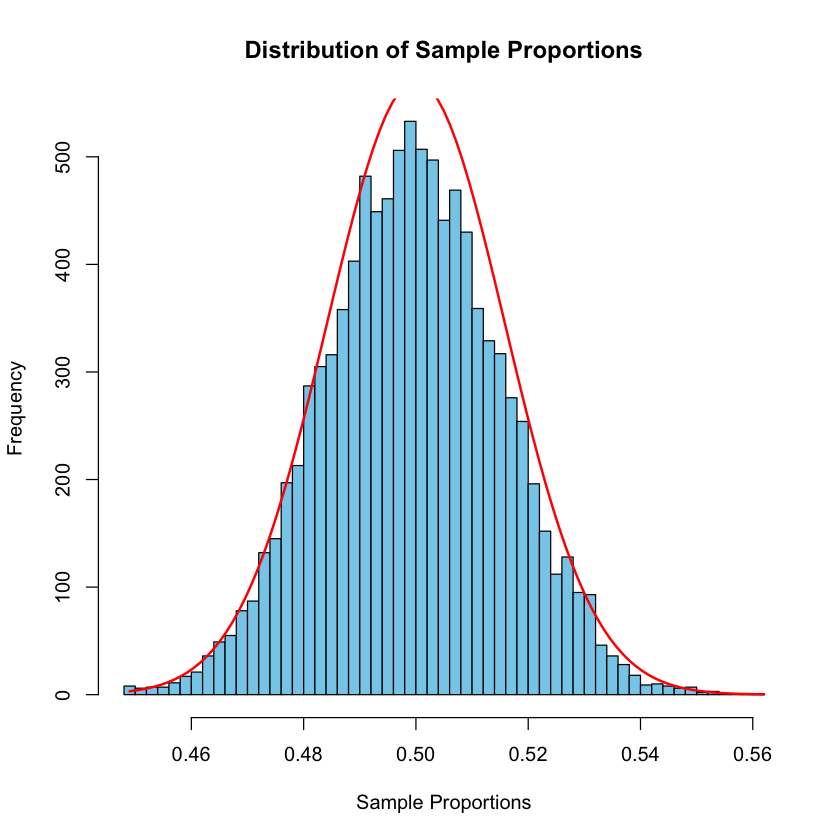

In [6]:
# Set parameters for the simulation
set.seed(123)  # For reproducibility
n <- 1000  # Large sample size
p <- 0.5   # Probability of success
q <- 1 - p
trials <- 10000  # Number of simulated samples

# Simulate trials and calculate sample proportions
sample_proportions <- replicate(trials, sum(rbinom(n, 1, p)) / n)

# Calculate empirical expected value and variance
empirical_mean <- mean(sample_proportions)
empirical_variance <- var(sample_proportions)

# Compare empirical and theoretical values
theoretical_mean <- p
theoretical_variance <- p * q / n

# Output the results
cat("Empirical Expected Value: ", empirical_mean, "\n")
cat("Empirical Variance: ", empirical_variance, "\n")
cat("Theoretical Expected Value: ", theoretical_mean, "\n")
cat("Theoretical Variance: ", theoretical_variance, "\n")

# Plot the distribution of the sample proportions
par(bg="white")
hist(sample_proportions, breaks=50, main="Distribution of Sample Proportions",
     xlab="Sample Proportions", ylab="Frequency", col="skyblue", border="black")

# Overlay the theoretical normal distribution
x_seq <- seq(min(sample_proportions), max(sample_proportions), length.out = 100)
normal_curve <- dnorm(x_seq, mean = p, sd = sqrt(theoretical_variance))
lines(x_seq, normal_curve * length(sample_proportions) * (max(sample_proportions) - min(sample_proportions)) / 50, col = "red", lwd = 2)



### <span style="color:#31a354">della <b><i>Varianza</i></b></span>

- b) Si definisca empiricamente  la distribuzione campionaria della varianza e si calcoli il suo valore atteso e la sua varianza e si rappresenti empiricamente

#### <span style="color:#3182bd">Varianza Campionaria</span>

![Screenshot 2023-12-31 at 11.49.36.png](<attachment:Screenshot 2023-12-31 at 11.49.36.png>)
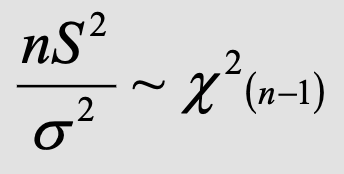

In [6]:
# Calcolo del valore atteso della varianza campionaria
# mean(varianzeC)
cat("Valore atteso della varianza campionaria: ", mean(varianzeC), "\n")

# Calcolo della varianza della varianza campionaria
# var(varianzeC)
cat("Varianza della varianza campionaria: ", var(varianzeC), "\n")

Valore atteso della varianza campionaria:  24.16993 
Varianza della varianza campionaria:  41.01042 


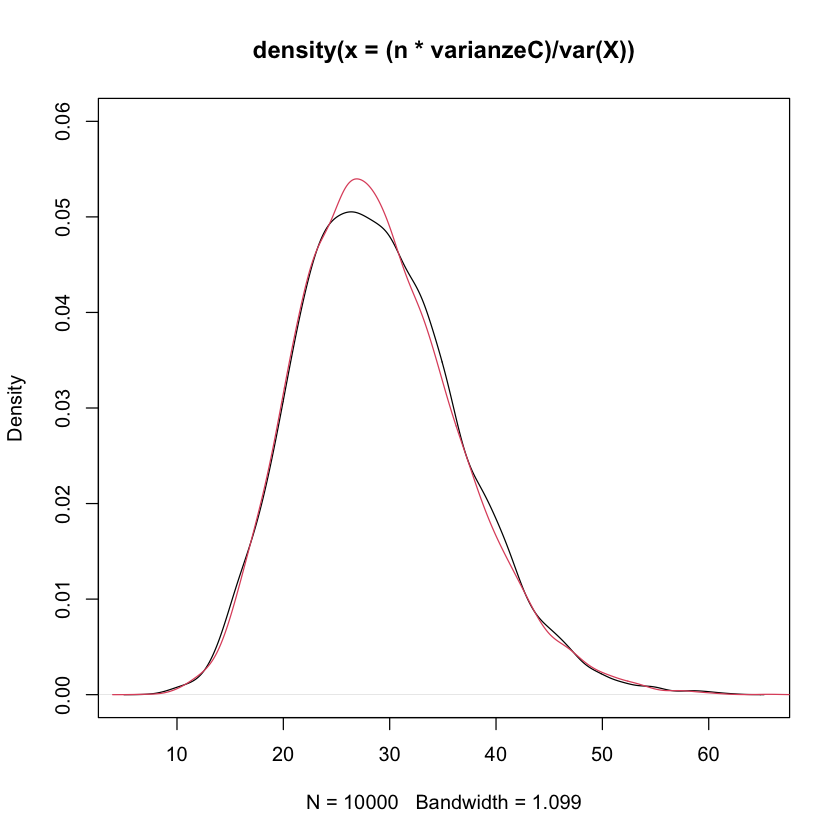

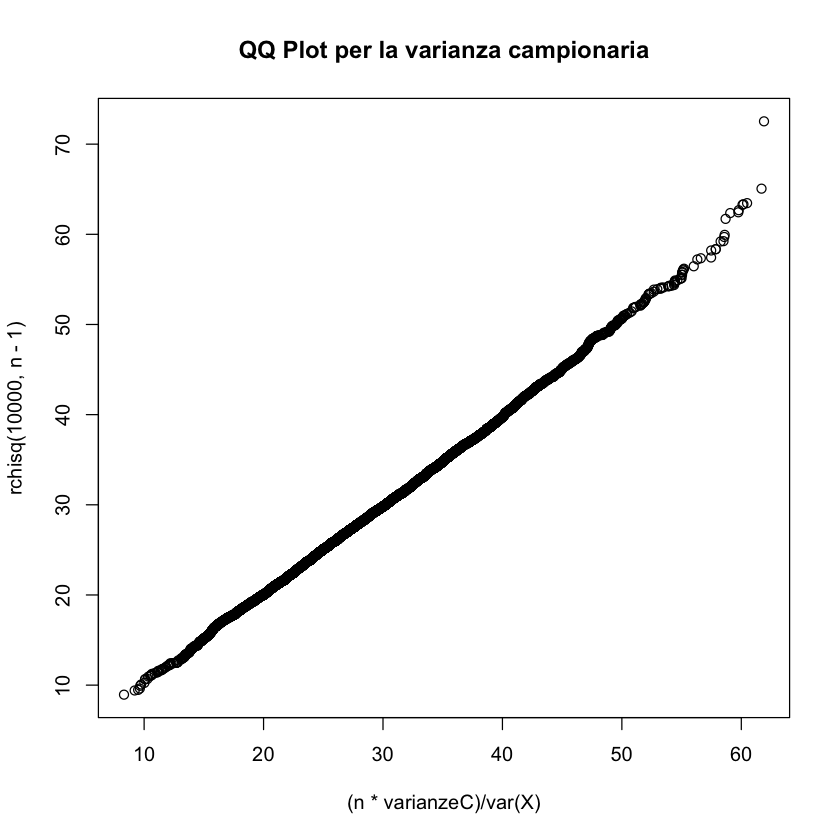

In [7]:
par(bg="white")
plot(density((n * varianzeC) / var(X)), ylim=c(0,0.06))

# Per la varianza campionaria, la distribuzione e chi quadro con n-1 gradi di liberta'
lines(density(rchisq(10000, n - 1)), col=2)
qqplot((n * varianzeC) / var(X),rchisq(10000, n - 1), 
    main="QQ Plot per la varianza campionaria")

#### <span style="color:#3182bd">Varianza Campionaria Corretta</span>

![Screenshot 2023-12-31 at 11.53.54.png](<attachment:Screenshot 2023-12-31 at 11.53.54.png>)
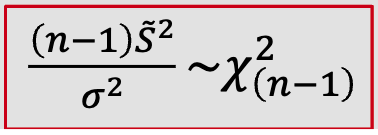

In [8]:
# Calcolo del valore atteso della variante campionaria corretta
# mean(varianzeCC)
cat("Valore atteso della varianza campionaria corretta: ", mean(varianzeCC), "\n")

# Calcolo della varianza della variante campionaria corretta
# var(varianzeCC)
cat("Varianza della varianza campionaria corretta: ", var(varianzeCC), "\n")

Valore atteso della varianza campionaria corretta:  25.00338 
Varianza della varianza campionaria corretta:  43.88749 


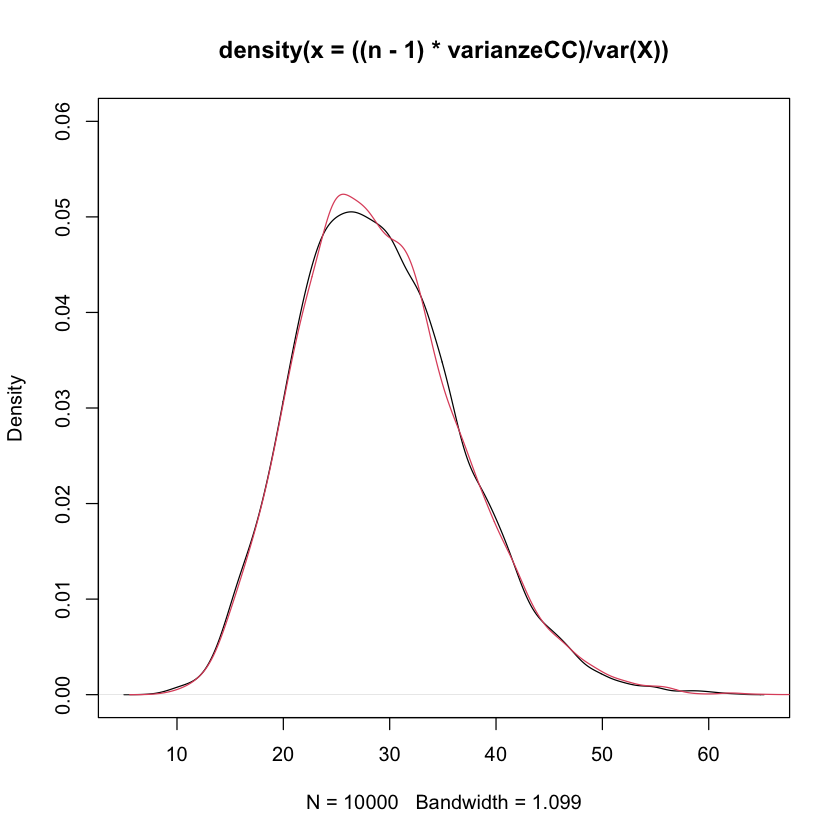

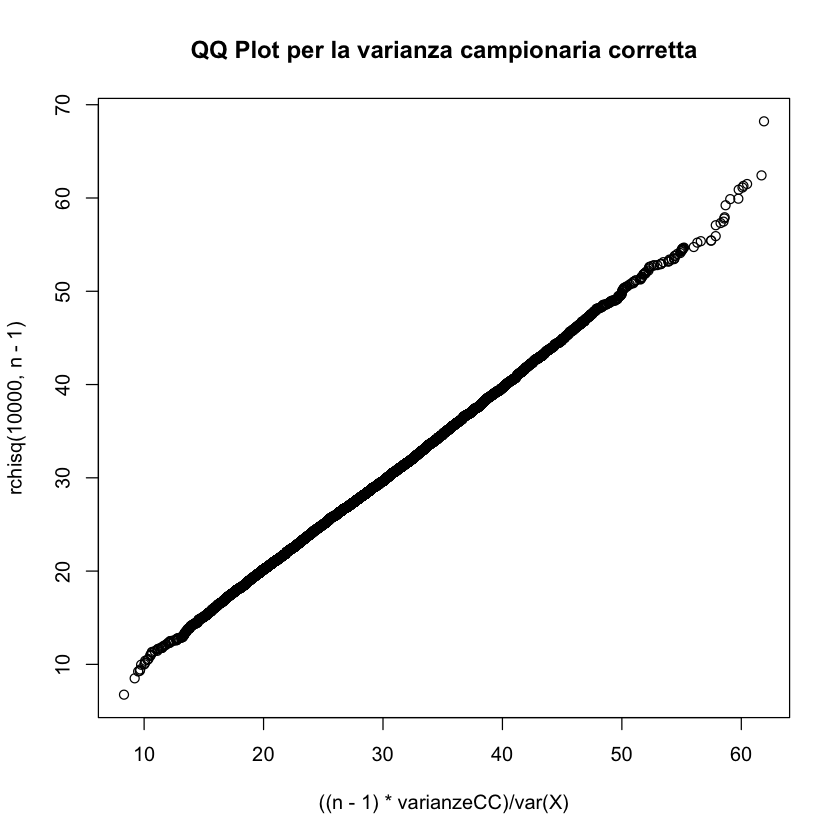

In [9]:
par(bg="white")
plot(density(((n - 1) * varianzeCC) / var(X)), ylim=c(0,.06))
lines(density(rchisq(10000, n - 1)), col=2)
qqplot(((n - 1) * varianzeCC) / var(X),rchisq(10000, n - 1), 
    main="QQ Plot per la varianza campionaria corretta")

In [10]:
# Verifichiamo che lo stimatore della varianza corretta e' corretto
# e che quindi ci restituisce un valore che e' uguale alla varianza della popolazione
# Varianza campionaria
mean(varianzeC)
# Varianza campionaria corretta
mean(varianzeCC)

[1] 24.16993

[1] 25.00338

### <span style="color:#31a354">della <b><i>Mediana</i></b></span>

- c) Si definisca empiricamente la distribuzione campionaria della mediana e si calcoli il suo valore atteso e la sua varianza e si rappresenti empiricamente

Valore atteso della mediana campionaria:  99.9799 
Valore atteso della media campionaria:  99.98781 
Varianza della mediana campionaria:  1.217271 


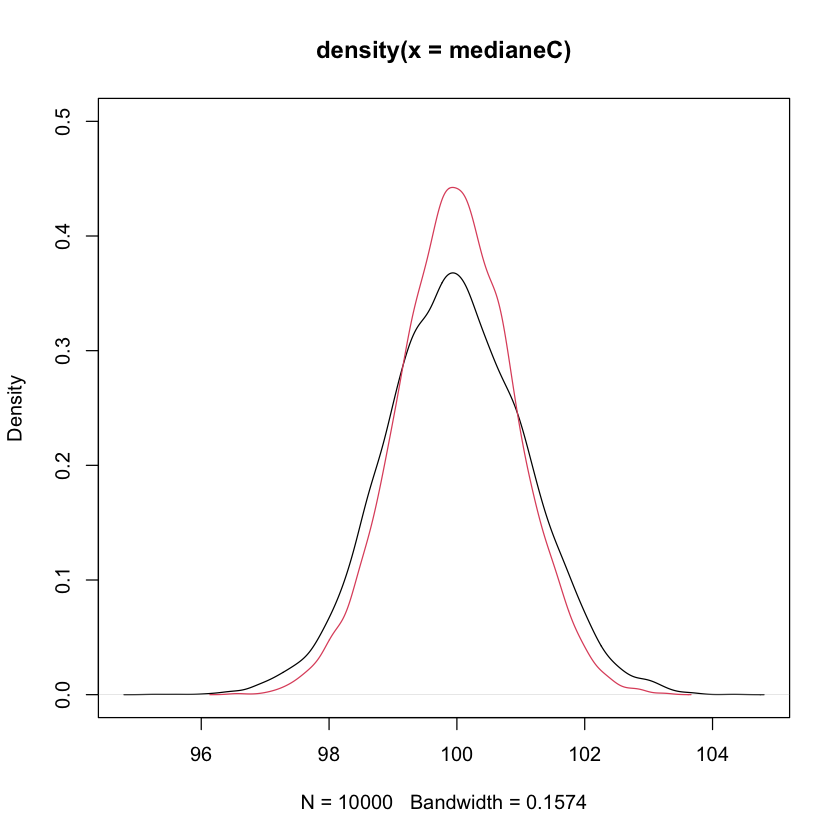

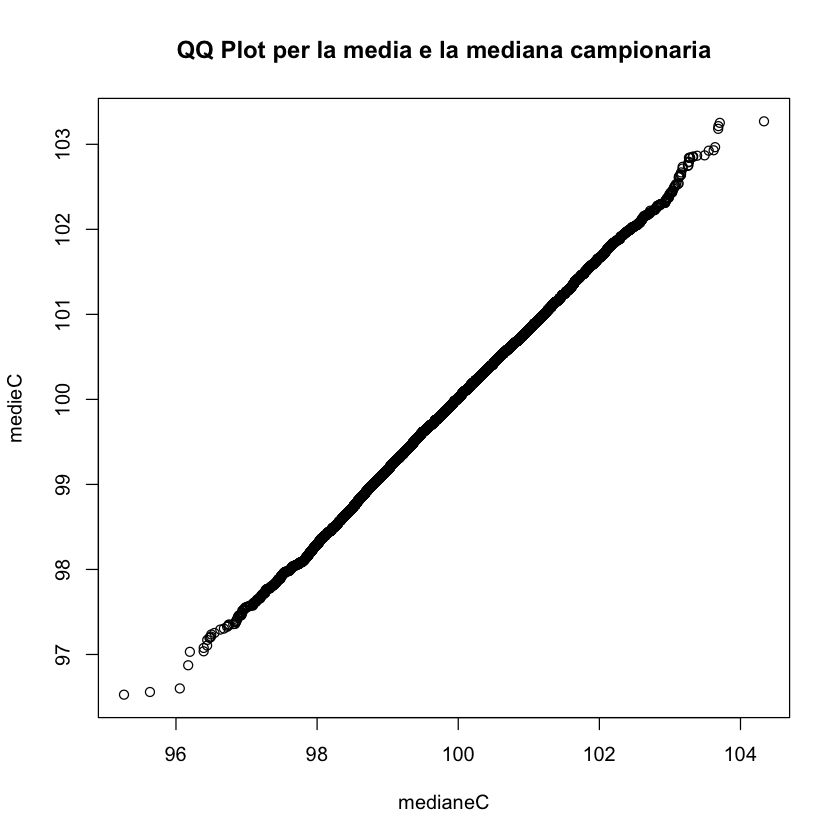

In [11]:
# Non abbiamo studiato lo stimatore mediana campionaria
# ma possiamo fare un paragone con la media campionaria
# mean(medianeC)
# mean(medieC)
# var(medianeC)

cat("Valore atteso della mediana campionaria: ", mean(medianeC), "\n")
cat("Valore atteso della media campionaria: ", mean(medieC), "\n")
cat("Varianza della mediana campionaria: ", var(medianeC), "\n")


par(bg="white")
plot(density(medianeC), ylim=c(0,0.5))
lines(density(medieC), col=2)
qqplot(medianeC, medieC, 
    main="QQ Plot per la media e la mediana campionaria")

### <span style="color:#31a354">della <b><i>differenza tra Medie</i></b> con <b><i>varianze NOTE</i></b></span>

### <span style="color:red">Da Verificare</span>

![Screenshot 2024-01-09 at 15.00.39.png](<attachment:Screenshot 2024-01-09 at 15.00.39.png>)
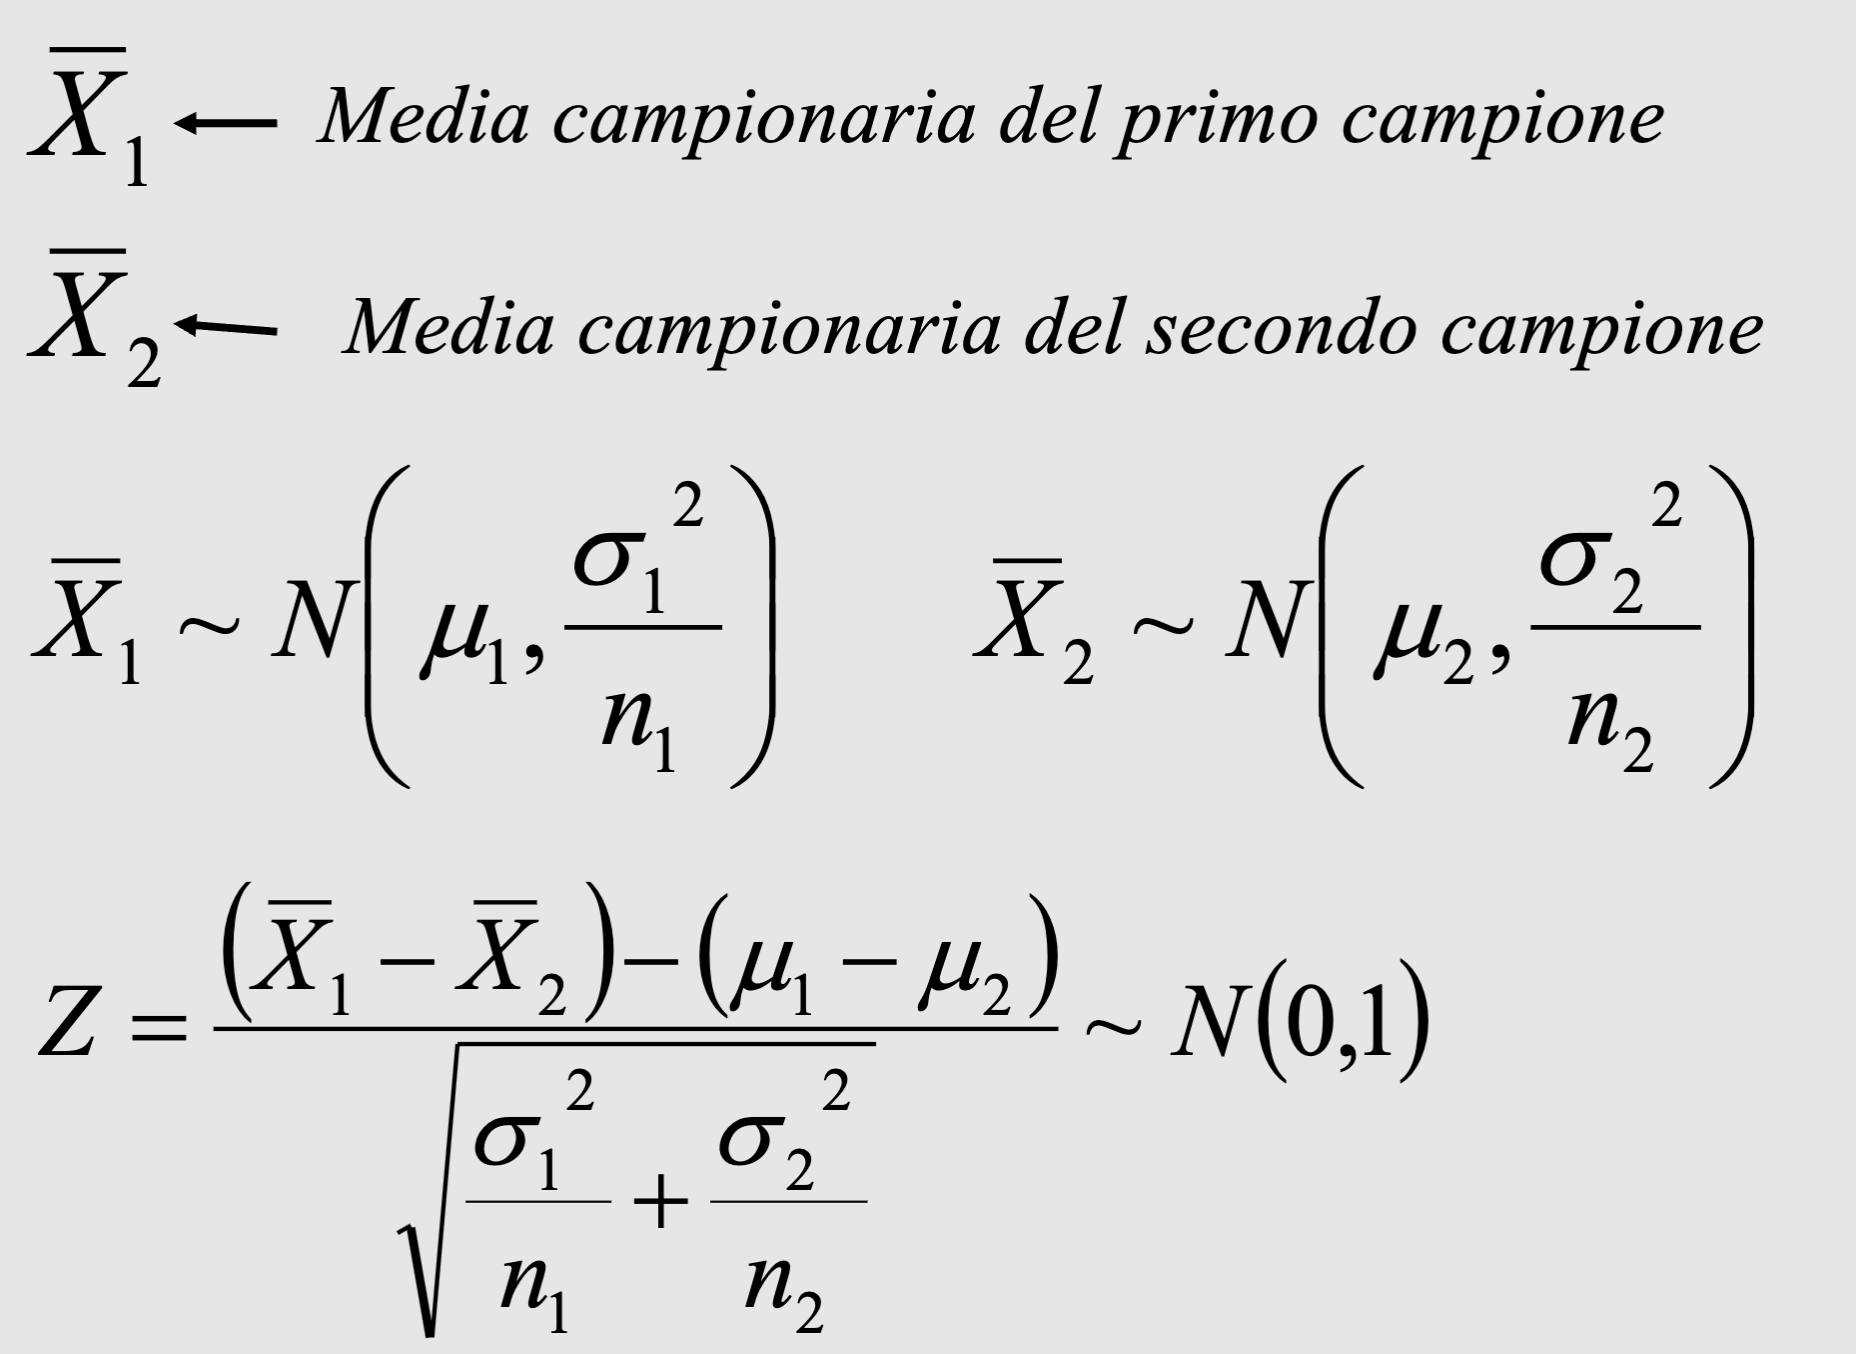

Sample Mean Difference:  -6.567517 
Z-value:  -0.422728 


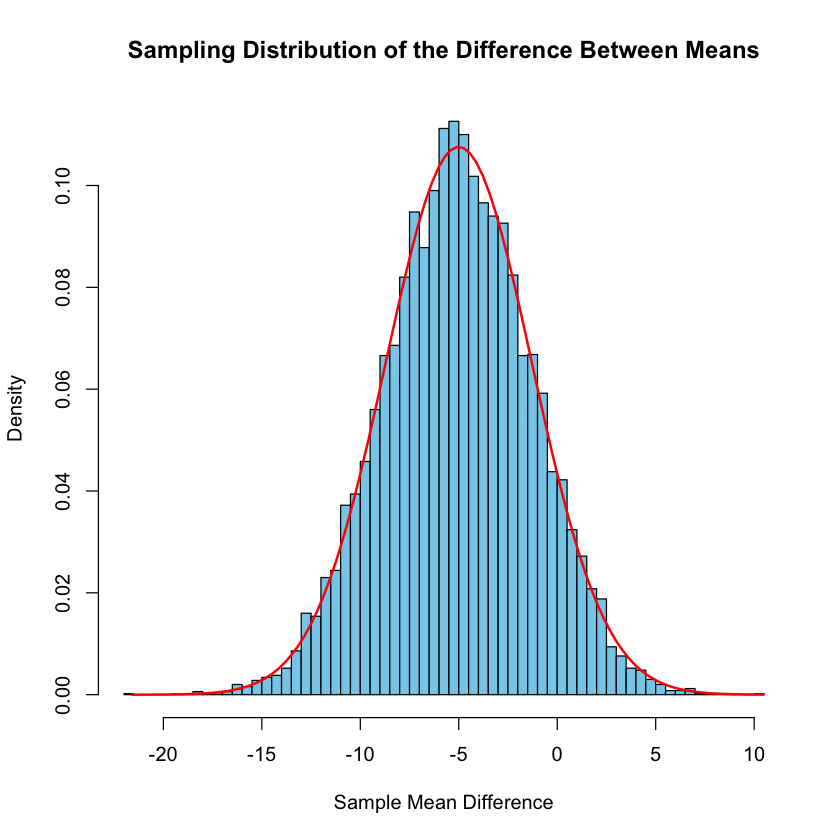

In [8]:
# Set the parameters for the simulation
set.seed(123)  # For reproducibility
mu1 <- 100  # Mean of the first population
mu2 <- 105  # Mean of the second population
sigma1 <- 15  # Standard deviation of the first population
sigma2 <- 20  # Standard deviation of the second population
n1 <- 60  # Size of the first sample
n2 <- 40  # Size of the second sample

# Generate the sample data
sample1 <- rnorm(n1, mean = mu1, sd = sigma1)
sample2 <- rnorm(n2, mean = mu2, sd = sigma2)

# Calculate the difference between the sample means
sample_mean_diff <- mean(sample1) - mean(sample2)

# Theoretical expectation and variance of the difference
expected_diff <- mu1 - mu2
variance_diff <- sigma1^2 / n1 + sigma2^2 / n2

# Standardize the difference
z <- (sample_mean_diff - expected_diff) / sqrt(variance_diff)

# Output the results
cat("Sample Mean Difference: ", sample_mean_diff, "\n")
cat("Z-value: ", z, "\n")

# Plot the sampling distribution of the difference
par(bg="white")
differences <- replicate(10000, mean(rnorm(n1, mu1, sigma1)) - mean(rnorm(n2, mu2, sigma2)))
hist(differences, breaks=50, probability=TRUE, main="Sampling Distribution of the Difference Between Means",
     xlab="Sample Mean Difference", ylab="Density", col="skyblue", border="black")

# Overlay the theoretical normal distribution
x_seq <- seq(min(differences), max(differences), length.out = 100)
normal_curve <- dnorm(x_seq, mean = expected_diff, sd = sqrt(variance_diff))
lines(x_seq, normal_curve, col = "red", lwd = 2)


### <span style="color:#31a354">della <b><i>differenza tra Medie</i></b> con <b><i>varianze INCOGNITE</i></b></span>

### <span style="color:red">Da Verificare</span>

![Screenshot 2024-01-09 at 15.00.50.png](<attachment:Screenshot 2024-01-09 at 15.00.50.png>)
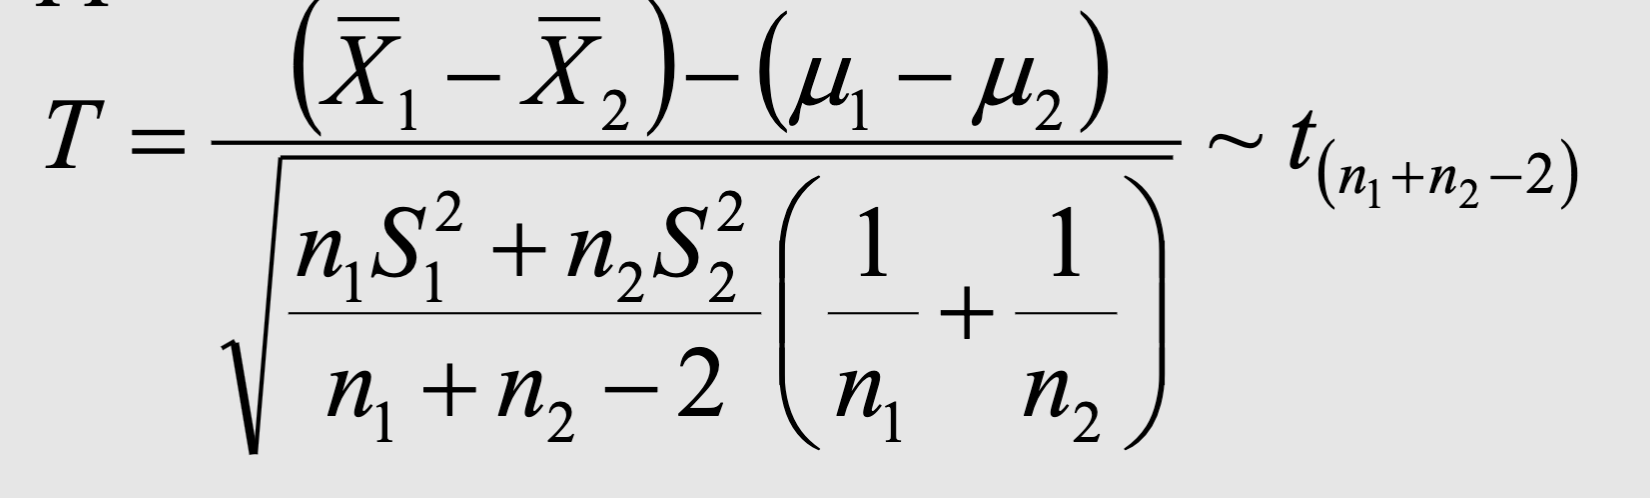

In [9]:
# Set the parameters for the simulation
set.seed(123)  # For reproducibility
n1 <- 30  # Size of the first sample
n2 <- 30  # Size of the second sample

# Generate the sample data
sample1 <- rnorm(n1, mean = 100, sd = 15)  # Sample 1 from a normal distribution
sample2 <- rnorm(n2, mean = 105, sd = 20)  # Sample 2 from a normal distribution

# Calculate the sample means and variances
mean1 <- mean(sample1)
mean2 <- mean(sample2)
var1 <- var(sample1)
var2 <- var(sample2)

# Calculate the pooled variance
pooled_var <- ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)

# Calculate the t-statistic for the difference between means
t_value <- (mean1 - mean2) / sqrt(pooled_var * (1/n1 + 1/n2))

# Calculate degrees of freedom
df <- n1 + n2 - 2

# Calculate the confidence interval for the difference between means
alpha <- 0.05  # For a 95% confidence interval
t_critical <- qt(alpha / 2, df, lower.tail = FALSE)
ci_lower <- (mean1 - mean2) - t_critical * sqrt(pooled_var * (1/n1 + 1/n2))
ci_upper <- (mean1 - mean2) + t_critical * sqrt(pooled_var * (1/n1 + 1/n2))
confidence_interval <- c(ci_lower, ci_upper)

# Output the results
cat("T-statistic: ", t_value, "\n")
cat("Degrees of freedom: ", df, "\n")
cat("95% confidence interval for the difference between means: ", confidence_interval, "\n")


T-statistic:  -2.281736 
Degrees of freedom:  58 
95% confidence interval for the difference between means:  -17.40861 -1.138037 


## <span style="color:#e6550d">Intervalli di Confidenza</span>

### <span style="color:#31a354">per la <b><i>Media con Varianza Nota</i></b></span>

- d) Si calcoli un IDC per la media con livello di confidenza pari al 95% e si dimostri empiricamente l'adeguatezza del livello di confidenza

![Screenshot 2023-12-31 at 12.09.25.png](<attachment:Screenshot 2023-12-31 at 12.09.25.png>)
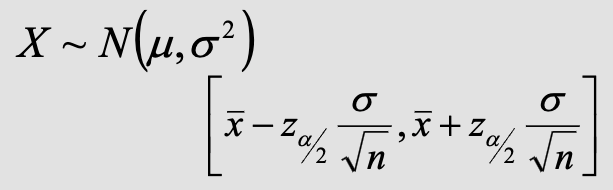

[1]  98.01784 101.59623

98.01784,101.5962
98.99257,102.5710
97.98555,101.5639
98.12301,101.7014
97.79670,101.3751


Il 95% delle medie campionarie rientra nell'intervallo di confidenza:  94.6 % 


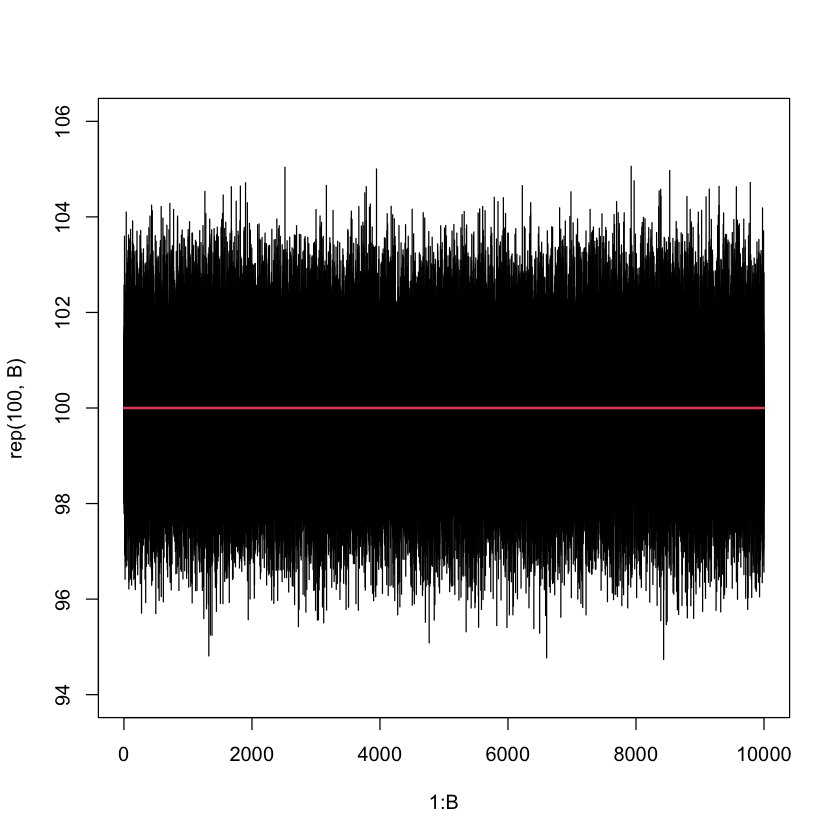

In [12]:
# m = media campionaria
# alpha = livello di significativita'
# var = varianza della popolazione
# n = dimensione del campione

IDCm <- function(m, alpha, var, n){
  xx <- qnorm(alpha / 2) * sqrt(var) / sqrt(n)
  Linf <- m + xx
  Lsup <- m - xx
  return(c(Linf, Lsup))
}

# Testiamo la funzione sul primo valore di medieC
IDCm(medieC[1], 0.05, 25, n)

# Applichiamo la funzione a tutti i valori di medieC
IDCm_vec <- matrix(rep(NA), B, 2)
for(i in 1:B) 
  IDCm_vec[i,] <- IDCm(medieC[i], 0.05, 25, n)
IDCm_vec[1:5,]


# Dimostriamo che il 95% delle medie campionarie rientra nell'intervallo di confidenza
# Devo verificarlo empiricamente, quindi devo andare a vedere quali
# intervalli contengono il valore 100
media_pop <- 100
cont <- 0
for(i in 1:B) 
  if(media_pop > IDCm_vec[i,1] && media_pop < IDCm_vec[i,2]) 
    cont <- cont + 1
cat("Il 95% delle medie campionarie rientra nell'intervallo di confidenza: ", 
  cont / 100,"%", "\n")

# IDCq <- quantile(medieC, c(.025, .975))
# IDCq

# Rappresentiamo graficamente gli intervalli di confidenza
par(bg="white")
# ? plot
plot(1:B, rep(100, B), type="n", ylim=c(94,106))
for(i in 1:B)
  lines(rep(i,2), IDCm_vec[i,], col=1, lwd=1)
lines(1:B, rep(100, B), lwd=2, col=2)

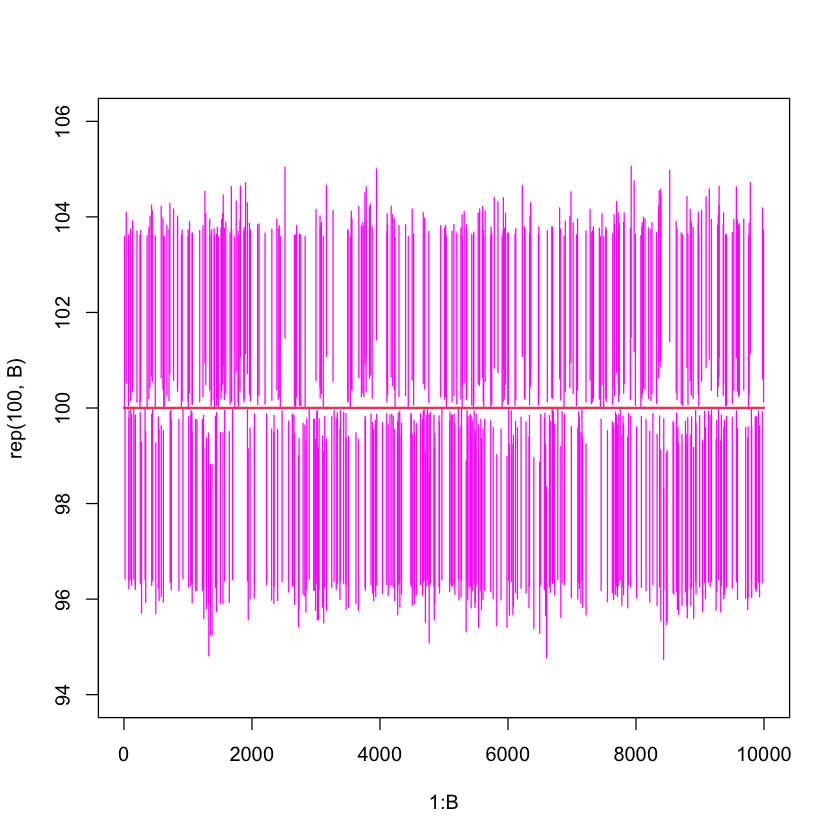

In [13]:
# Rappresentiamo graficamente gli intervalli di confidenza che non contengono la media
par(bg="white")
plot(1:B, rep(100, B), type="n", ylim=c(94,106))
for(i in 1:B) {
  # Se la media della popolazione NON è all'interno dell'intervallo di confidenza, 
  # colora in fuchsia
  if(media_pop <= IDCm_vec[i,1] || media_pop >= IDCm_vec[i,2]) {
    lines(rep(i,2), IDCm_vec[i,], col="#ff00ff", lwd=1)
  } 
  #else {
   # lines(rep(i,2), IDCm_vec[i,], col=1, lwd=1)
  #}
}
lines(1:B, rep(100, B), lwd=2, col=2) # Linea della media della popolazione


### <span style="color:#31a354">per la <b><i>Varianza</i></b></span>

- e) Si calcoli un IDC per la varianza con livello di confidenza pari al 90% e si dimostri empiricamente l'adeguatezza del livello di confidenza

![Screenshot 2023-12-31 at 14.29.39.png](<attachment:Screenshot 2023-12-31 at 14.29.39.png>)
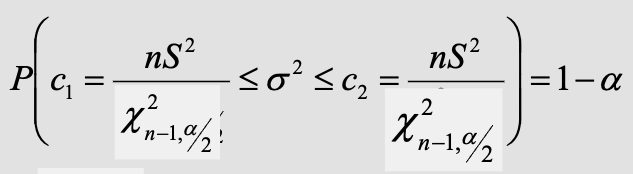

[1] 11.64691 27.99000

11.646910,27.99000
28.774490,69.15122
15.751108,37.85326
18.870473,45.34976
9.065647,21.78668


Il 90% delle varianze campionarie rientra nell'intervallo di confidenza:  89.73 % 


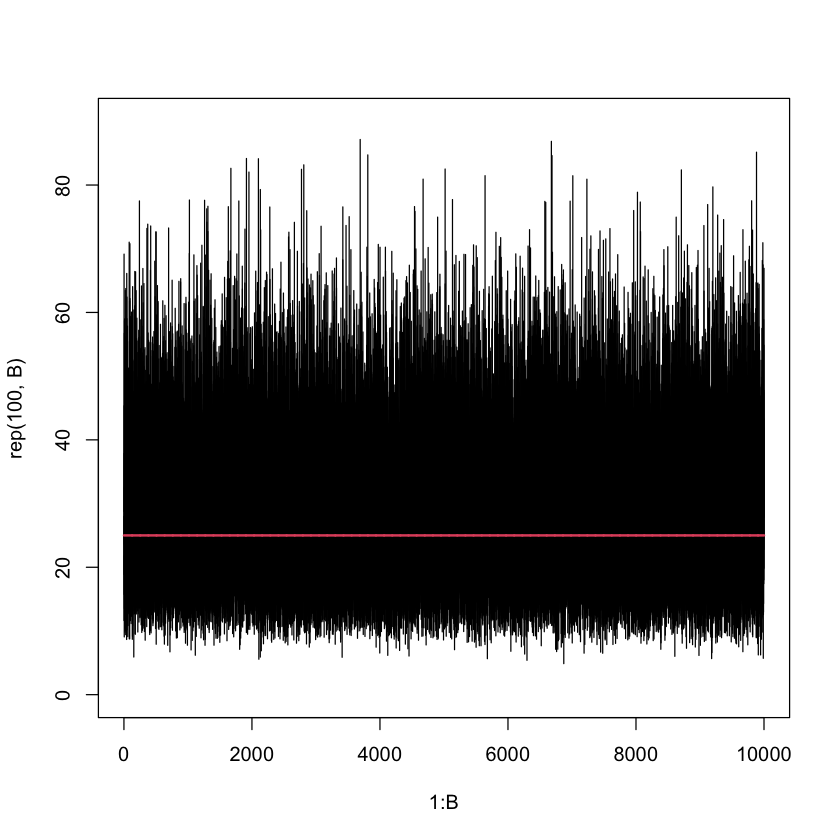

In [14]:
# s2 = varianza campionaria
# alpha = livello di significativita'
# n = dimensione del campione

IDCvar <- function(s2, alpha, n){
  chi1 <- qchisq(alpha/2, n - 1)
  chi2 <- qchisq(1 - alpha/2, n - 1)
  Linf <- (n * s2) / chi2
  Lsup <- (n * s2) / chi1
  return(c(Linf, Lsup))
}

IDCvar(varianzeC[1], 0.1, n)

IDCvar_vec <- matrix(rep(NA), B, 2)
for(i in 1:B) 
  IDCvar_vec[i,] <- IDCvar(varianzeC[i], 0.1, n)
IDCvar_vec[1:5,]

cont <- 0
for(i in 1:B) 
  if(25 > IDCvar_vec[i,1] && 25 < IDCvar_vec[i,2]) 
    cont <- cont + 1
cat("Il 90% delle varianze campionarie rientra nell'intervallo di confidenza: ", 
  cont / 100,"%", "\n")

par(bg="white")
# ? plot
plot(1:B, rep(100, B), type="n", ylim=c(0,90))
for(i in 1:B)
  lines(rep(i,2), IDCvar_vec[i,], col=1, lwd=1)
lines(1:B, rep(25, B), lwd=2, col=2)

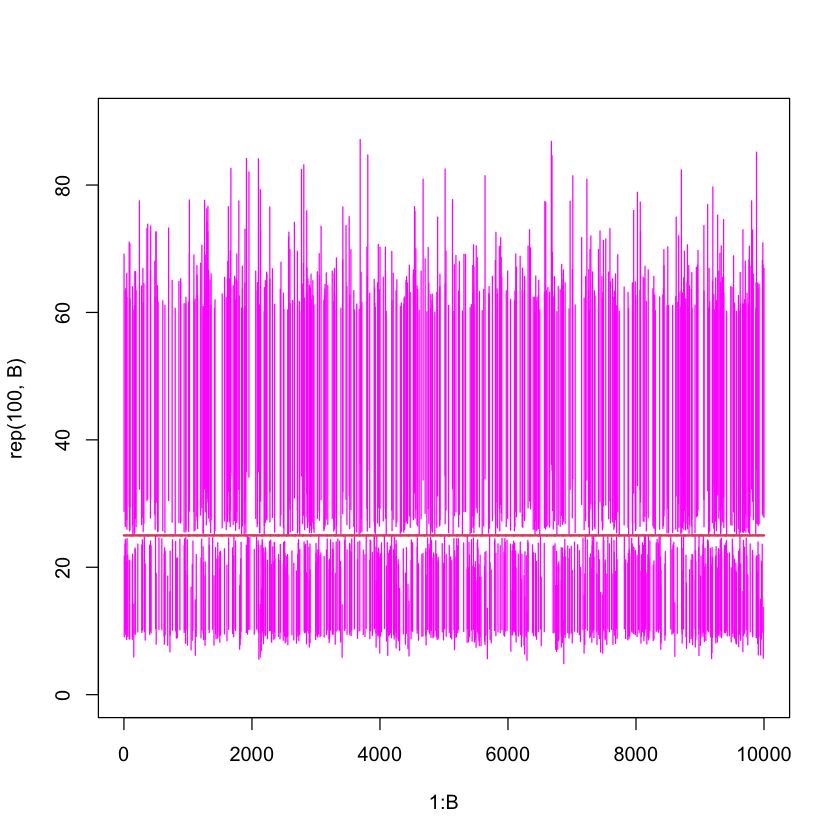

In [15]:
# Rappresentiamo graficamente gli intervalli di confidenza che non contengono la varianza
par(bg="white")
plot(1:B, rep(100, B), type="n", ylim=c(0,90))
for(i in 1:B) {
  # Se la varianza della popolazione NON è all'interno dell'intervallo di confidenza, 
  # colora in fuchsia
  if(25 < IDCvar_vec[i,1] || 25 > IDCvar_vec[i,2])  {
    lines(rep(i,2), IDCvar_vec[i,], col="#ff00ff", lwd=1)
  } 
  #else {
   # lines(rep(i,2), IDCm_vec[i,], col=1, lwd=1)
  #}
}
lines(1:B, rep(25, B), lwd=2, col=2) # Linea della media della popolazione
